# Методология машинного обучения

В прошлой лекции мы обсуждали, какие задачи стоят перед специалистами в области машинного обучения. Вне зависимости от класса решаемой задачи и метода ее решения существует набор правил, методов и подходов, которыми пользуются все специалисты в области машинного обучения и науки о данных. Сегодняшняя лекция будет посвящена обсуждению таких методик, которыми мы будем пользоваться вплоть до окончания нашего курса, а те из вас, кто решит продолжить обучение машинному обучению и нейронным сетям, - и в дальнейшем.

Итак, в контексте сегодняшней лекции мы будем считать, что у нас в руках есть не только набор данных $X$, набор меток $y$ и постановка задачи, но и некоторый алгоритм $A$, который мы умеем **обучать** (то есть подбирать параметры этого алгоритма так, чтобы алгоритм решал задачу достаточно качественно). На следующих лекциях мы будем уточнять, какими бывают такие алгоритмы, как эти алгоритмы обучать и как измерять их качество. Сегодня же обсудим, как убедиться в том, что алгоритм будет обучен корректно, а также познакомимся с некоторыми функциями из библиотеки `sklearn`.

## Обучение алгоритма и оценка его качества

Работа с алгоритмами в машинном обучении строится в два этапа:

1. Обучение алгоритма
2. Проверка качества обученного алгоритма

В каком-то смысле, можно воспринимать работу по обучения алгоритма, как работу по обучению школьника некоторому предмету. Обучение алгоритма соответствует в рамках этого сравнения стандартным школьным урокам, на которых ученики решают задачи под наблюдением учителя и немедленно получают обратную связь, имея возможность скорректировать свои представления о верном способе решения задачи, если была допущена ошибка. Этап тестирования модели соотвествует контрольной работе, на которой ученик должен продемонстрировать полученные знания, при этом **(a)** *не имея доступа к правильным ответам* **(б)** *не имея доступа к обратной связи от учителя, а значит - не имея возможности скорректировать свою стратегию решения задачи.*

## Разбиение выборки на train и test.

Сразу оговоримся, что под выборкой в данном случае мы понимаем множество доступных для анализа объектов. По большому счёту, термины *выборка*, *датасет*, *набор данных* и т.п. в рамках нашего разговора являются взаимозаменяемыми синонимами за редкими исключениями, которые будут оговариваться отдельно.

В базовом случае мы разбиваем выборку на так называемые *тренировочную* и *тестовую* выборки. Это нужно для того, чтобы не ввести себя в заблуждение, оценивая качество работы алгоритма на тех же данных, что использовались при его обучении. **Оценка качества работы модели на тренировочной выборке не показательна**. Ведь наш алгоритм всегда мог подстроить свои параметры так, чтобы результат именно на этой тренировочной выборке будет хорошим, однако ни к каким другим данным его применить будет нельзя.

Логика такая же, как у учителей в школе: если дать ученику домашнюю работу, то он может подсмотреть ответы в конце учебника и просто их запомнить, не разобравшись в теме. Поэтому на контрольной работе необходимо дать задачи, которые будут отличаться от выданных ранее в качестве домашней работы. В данном случае, тренировочной выборкой выступает домашнее задание, его цель - натренировать ученика, научить его решать некоторый тип задач. А тестовая выборка - это контрольная работа. Домашнюю работу хорошо решить могут и плохой, и хороший ученики, а вот контрольную хорошо решит только хороший. Также и с разбиением на тренировочную и тестовую выборки.

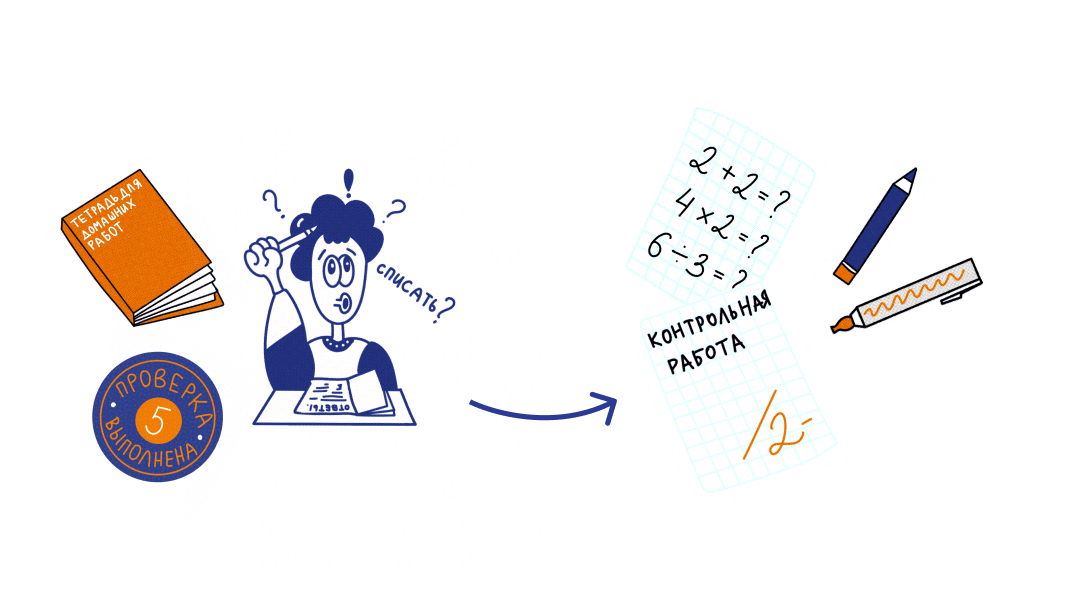

Специально для разделения выборок на тренировочную и тестовую в `sklearn` реализована функция ```sklearn.model_selection.train_test_split```:

In [ ]:
from sklearn.model_selection import train_test_split

Для примера сгенерируем выборку в виде круга на двумерной плоскости:

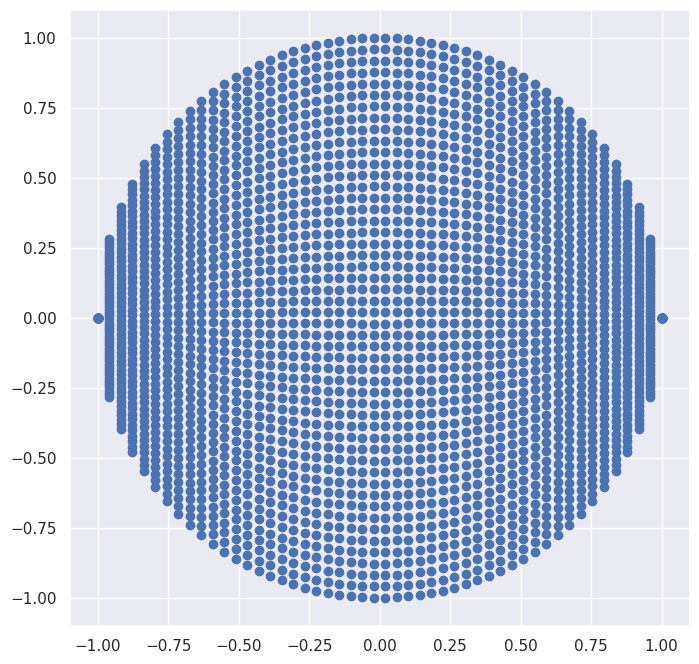

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

DATASET = []

for x in np.linspace(-1, 1, 50):
    for y in np.linspace(-np.sqrt(1 - x**2), np.sqrt(1 - x**2), 50):
        DATASET.append([x, y])

DATASET = np.array(DATASET)

plt.figure(figsize=(8, 8))
plt.scatter(DATASET[:, 0], DATASET[:, 1])

В качестве метки присвоим каждой точке сумму её координат:

In [ ]:
y = np.sum(DATASET, axis=-1)

Пусть мы хотим разбить эту выборку на тренировочную и тестовую в пропорции 3:1. Тогда ровно 0.25 объектов нашей выборки должны отправиться в тестовую выборку. Причем мы хотим, чтобы набор меток $y$ также корректно разделился на тестовый и тренировочный набор, согласно тому, как были разделены объекты.

Воспользуемся для этого функцией ```train_test_split```

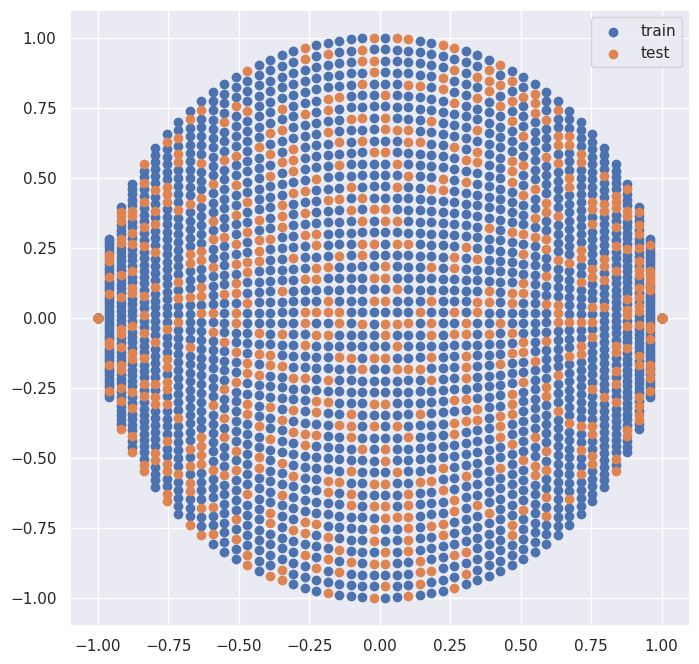

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(DATASET, y, test_size=0.25)
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], label="train")
plt.scatter(X_test[:, 0], X_test[:, 1], label="test")
plt.legend()

Как мы видим, точки датасета были распределены между `train` и `test` в случайном порядке. Эта случайность бывает необходима для того, чтобы гарантировать *репрезентативность* полученных выборок (то есть отличие некоторых свойств, наблюдаемых в конкретной выборке, от тех же свойств, наблюдаемых в целом). Чтобы пояснить эту идею, рассмотрим такой пример:

Пусть вы хотите обучить модель, отличающую розы от тюльпанов по фотографии. Вы попросили друзей-биологов из ботанического сада собрать для вас небольшую выборку фотографий этих цветов. Друзья, не зная ничего о тонкостях обучения моделей ML, поступили следующим образом: сначала cфотографировали 75 образцов тюльпанов, а лишь затем 25 образцов роз, пронумеровали полученные фотографии от 1 до 100 по мере их получения и отдали вам в таком виде. Что теперь будет, если вы разделите выборку на тренировочную и тестовую в соотношении 2:1, не перемешав её? Ваш алгоритм решит, что все цветы в мире - это тюльпаны, ведь все поданные ему на вход данные содержали метку "тюльпан".

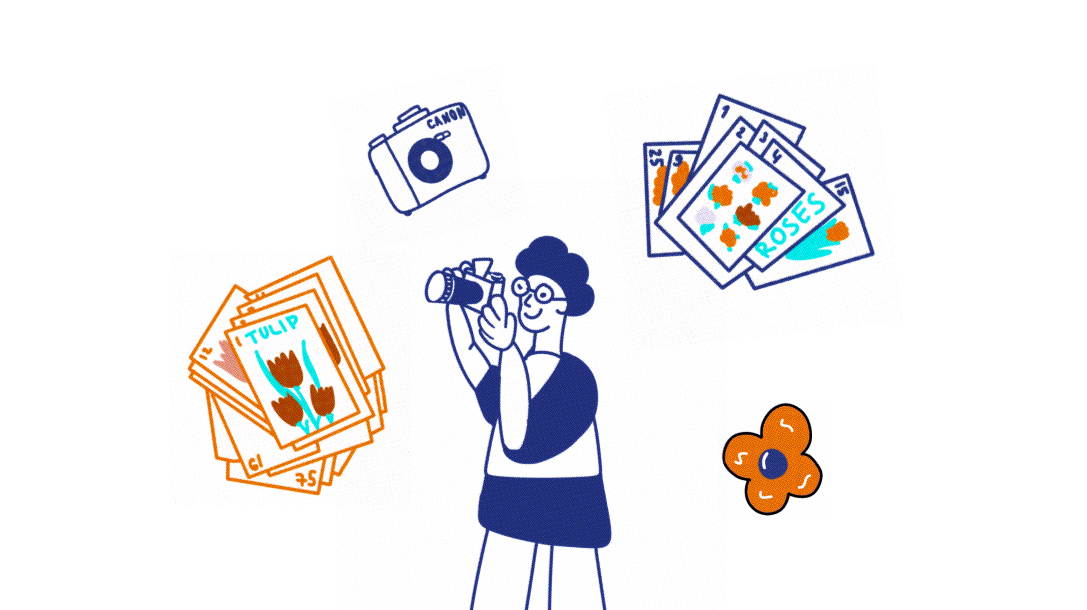

Это лишь самый простой пример, в действительности скрытые зависимости в данных бывают и намного более сложными. Поэтому почти всегда необходимо перемешивать выборку.

Но в связи с этим возникают и свои проблемы. Понятно, что результат оценки качества модели зависит от способа разбиения выборки на `train` и `test`. В хорошем случае эта зависимость крайне слаба, и в целом неважно, какие конкретно объекты попадут в `train`, а какие - в `test`. Но, к сожалению, обычно эта зависимость всё же ощутима. Если кто-то решит воспроизвести полученный вами результат на своём собственном компьютере, его результат может быть отличен от вашего из-за элемента случайности, внесённого перемешиванием выборки.

Более того, часто различные случайные структуры присутствуют и в самих алгоритмах ML. Нам с вами еще предстоит изучить такие алгоритмы, как `Random Forest`, `Neural Networks`, `Decision Trees` и многие другие. Все они в той или иной мере используют различные элементы случайности при обработке данных. Совокупный эффект от всех этих структур может накопиться и сделать воспроизведение ваших результатов совершенно невозможным!

С этим можно бороться довольно просто.
Дело в том, что случайные числа, генерируемые компьютером, в реальности **не случайны**. Существует алгоритм, по которому можно однозначно восстановить все сгенерированные случайные значения. Именно по этой причине такие числа обычно называют **псевдослучайными**. Но всё не так просто: в основе этого алгоритма лежит некоторое заранее заданное число, которое обычно называют **`random_seed`** (иногда иначе, например, часто его называют `random_state`). Это своеобразный ключ доступа к сгенерированным псевдослучайным числам. В базовом случае это число стараются взять как можно более случайным. Например, берут текущее тактовое время процессора - эту величину очень сложно предугадать. В реальности именно `random_seed` является в классическом понимании случайным числом, ведь никто и никогда заранее не угадает сколько времени вы потратите на перерыв на чай, прежде чем нажмёте кнопку выполнения алгоритма, и `random_seed` будет взят из процессора как текущее значение некоторой переменной. **Но, зная `random_seed`, можно однозначно восстановить все случайные величины, которые были использованы в вашей работе!**

Именно по этой причине это значение часто задают самостоятельно.
Так вышло, что многие программисты стараются использовать число 42 в качестве `random_seed`. Это всего лишь традиция, здесь не стоит искать какого-то глубокого смысла.

По этой причине всегда рекомендуется перед началом работы прописывать строчку инициализации `random_seed`, а также во всех алгоритмах, где это возможно, самостоятельно прописывать значение `random_state`.

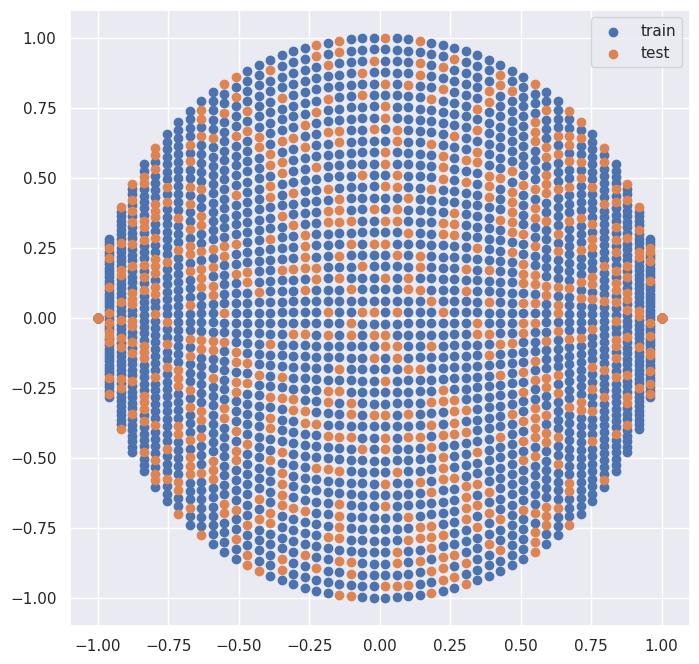

In [ ]:
# Строка, устанавливающая seed для модуля np.random
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    DATASET, y, test_size=0.25, random_state=42
)
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], label="train")
plt.scatter(X_test[:, 0], X_test[:, 1], label="test")
plt.legend()

Убедимся в том, что одинаковый `random_state` даст нам один и тот же результат, а разные `random_state` - разные:

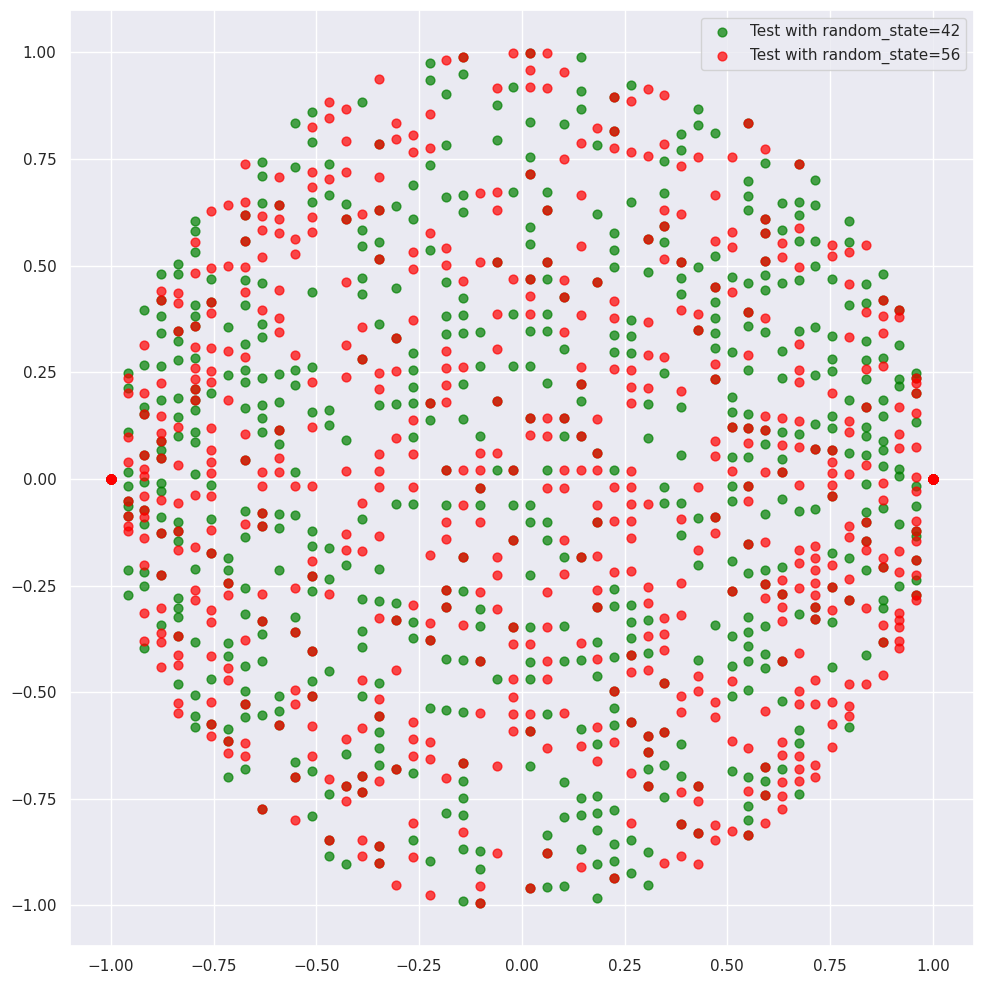

In [ ]:
X_train, X_test_1, y_train, y_test_1 = train_test_split(
    DATASET, y, test_size=0.25, random_state=42
)
X_train, X_test_2, y_train, y_test_2 = train_test_split(
    DATASET, y, test_size=0.25, random_state=56
)
plt.figure(figsize=(10, 10))
plt.scatter(
    X_test_1[:, 0], X_test_1[:, 1],
    label="Test with random_state=42",
    color="green",
    alpha=0.7,
    s=40
)
plt.scatter(
    X_test_2[:, 0], X_test_2[:, 1],
    label="Test with random_state=56",
    color="red",
    alpha=0.7,
    s=40
)
plt.legend()
plt.tight_layout()


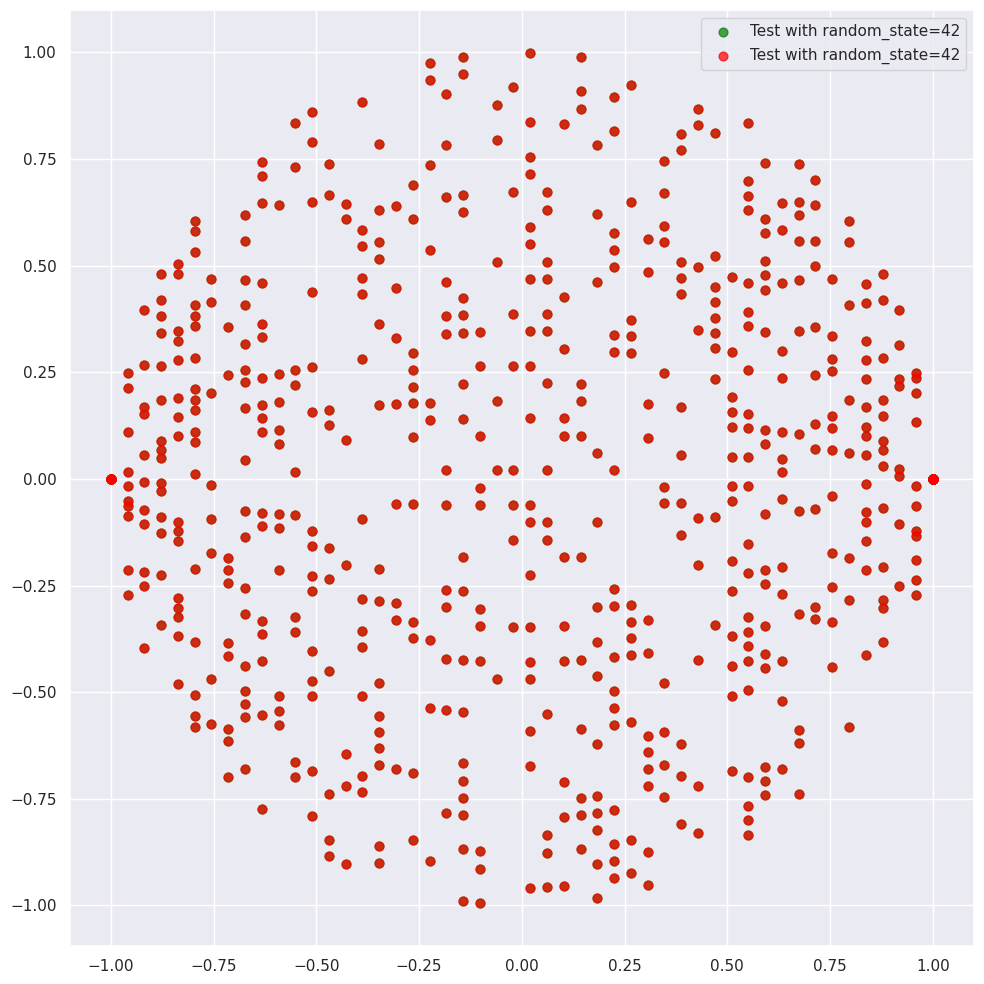

In [ ]:
X_train, X_test_1, y_train, y_test_1 = train_test_split(
    DATASET, y, test_size=0.25, random_state=42
)
X_train, X_test_2, y_train, y_test_2 = train_test_split(
    DATASET, y, test_size=0.25, random_state=42
)
plt.figure(figsize=(10, 10))
plt.scatter(
    X_test_1[:, 0], X_test_1[:, 1],
    label="Test with random_state=42", color="green", alpha=0.7, s=40
)
plt.scatter(
    X_test_2[:, 0], X_test_2[:, 1],
    label="Test with random_state=42", color="red", alpha=0.7, s=40
)
plt.legend()
plt.tight_layout()


Они полностью наложились друг на друга, именно этого мы и добивались.

Бывают ли ситуации, когда делать перемешивание выборки вредно?
Бывают. Иногда сама структура данных предполагает связь между соседними элементами. Например, во многих задачах связанных с временными рядами необходимо сохранить исходную последовательность данных.

В этом случае мы можем установить значение аргумента `shuffle` функции `train_test_split` в позицию `False`

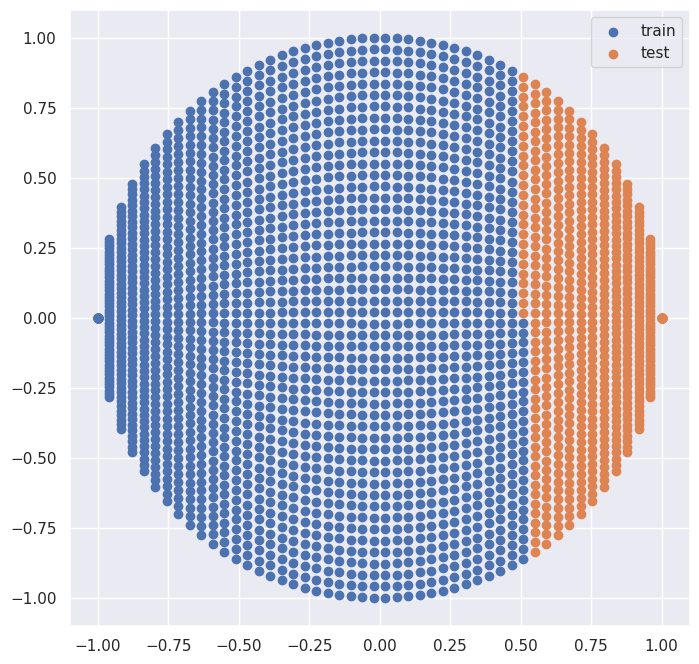

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(
    DATASET, y, test_size=0.25, shuffle=False
)
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], label="train")
plt.scatter(x_test[:, 0], x_test[:, 1], label="test")
plt.legend()

#### Стратификация

При разбиении выборки на тренировочную и тестовую необходимо следить за тем, чтобы эти выборки были как можно больше похожи друг на друга. К критериям такой похожести относится, например, сохранение основных выборочных параметров всех признаков и целевой переменной (математического ожидания, стандартного отклонения и т.п.). Очень частым примером ошибки, которую можно допустить при разбиении выборки на train и test, является **изменение соотношения классов** в целевой переменной при решении задачи классификации. Довольно часто выборки бывают *дисбалансными*, то есть соотношение классов в них неравное. Например, всего 5% объектов в датасете может принадлежать классу $1$, в то время как целых 95% принадлежит классу $0$. В этом случае случайное разбиение выборки на train и test может привести к тому, что соотношение классов в тренировочной и тестовой выборках будет очень сильно отличаться, как в примере ниже.

In [ ]:
np.random.seed(42)

# Зададим синтетические метки классов с примерным соотношением 5% - 95%
Y_full = np.random.choice([0, 1], size=[100], p=[0.95, 0.05])
print((Y_full == 1).sum())

5


А теперь проверим, что будет с соотношением меток в тренировочной и тестовой выборках при разбиении такой выборки в соотношении 4:1

In [ ]:
y_train, y_test = train_test_split(Y_full, test_size=0.2, random_state=42)
print((y_train == 1).sum())

5


Все объекты класса 1 попали в тренировочную выборку. То есть соотношение классов в тренировочной выборке теперь $6.25$% против $93.75$%, а в тестовой - $0$% против $100$%. Заметное отличие.

Эту проблему можно решить при помощи метода **стратификации**. Это метод, позволяющий сохранить распределение классов в обеих выборках одинаковым. В `sklearn` существует возможность активации этого метода при использовании функции `train_test_split`. Для этого нужно передать вектор меток с исходным распределением в качестве аргумента `stratify` этой функции.

In [ ]:
y_train, y_test = train_test_split(Y_full, test_size=0.2, random_state=42, stratify=Y_full)
print((y_train == 1).sum())

4


При использовании стратификации можно не опасаться, что тренировочная и тестовая выборки окажутся "сдвинутыми" относительно исходного распределения целевой переменной, что делает их более репрезентативными.

____________________________________

**Замечание:** иногда на практике выборки разбивают не на две части, а на три. Третья часть в этом случае называется **валидационной**. Это делается по двум причинам:

>1. Некоторые алгоритмы машинного и глубинного обучения могут учиться достаточно долго и бывает очень полезно отслеживать как изменяется качество алгоритма во время его обучения. В этом случае валидационная выборка используется для оценки качества во время обучения модели и составления промежуточных выводов о том, как обучается алгоритм. Валидационная выборка также "не показывается" алгоритму, она имитирует тестовую.

>2. Для большинства алгоритмов машинного обучения существует проблема подбора **гиперпараметров**, то есть параметров алгоритма, которые не могут быть определены автоматически, требуют ручного экспертного подбора. Подбор гиперпараметров - это тоже своеобразное обучение алгоритма, поскольку они могут достаточно сильно влиять на качество. Валидационная выборка в этом случае представляет из себя что-то вроде тренировочной выборки, но для подбора гиперпараметров. То есть по качеству алгоритма на валидационной выборке выбираются гиперпараметры модели, но затем модель всё еще необходимо протестировать целиком - с учетом подобранных вручную гиперпараметров и параметров, подобранных автоматически.

Вообще разбиение выборки на три части вместо двух в основном характерно для работы с нейронными сетями и в нашем курсе встречаться почти не будет.

А теперь представим себе маловероятную, но все же далеко не фантастическую ситуацию. Плохой ученик абсолютно случайно хорошо написал контрольную работу, совершнно не разбираясь в теме. Тест мог оказаться слишком лёгким даже по меркам двоечников, или же ответы могли быть банально угаданы. В жизни всякое бывает. И в статистике тоже. Тестовая выборка, которую мы сформируем для нашего алгоритма может оказаться не слишком показательной, "сдвинутой" или же просто хорошо подойдёт для какого-то конкретного алгоритма по чистой случайности.  Это приводит нас к мысли о том, что по-хорошему нужно использовать целый набор тестовых выборок для более точной оценки алгоритма. Один из методов, позволяющих осуществить такую оценку, - это **метод кросс-валидации**.

## Метод кросс-валидации

Чтобы оценить качество нашей модели воспользуемся таким **методом cross-validation** (*перекрёстная проверка, кросс-проверка, скользящий контроль*, *перекрёстная валидация*) — метод оценки аналитической модели и её поведения на независимых данных. При оценке модели имеющиеся в наличии данные разбиваются на $n$ частей (это число выбираем мы). Затем на $n$−1 частях данных производится обучение модели, а оставшаяся часть данных используется для тестирования. Процедура повторяется $n$ раз. В итоге каждая из $n$ частей данных используется для тестирования. В результате получается оценка эффективности выбранной модели с наиболее равномерным использованием имеющихся данных.

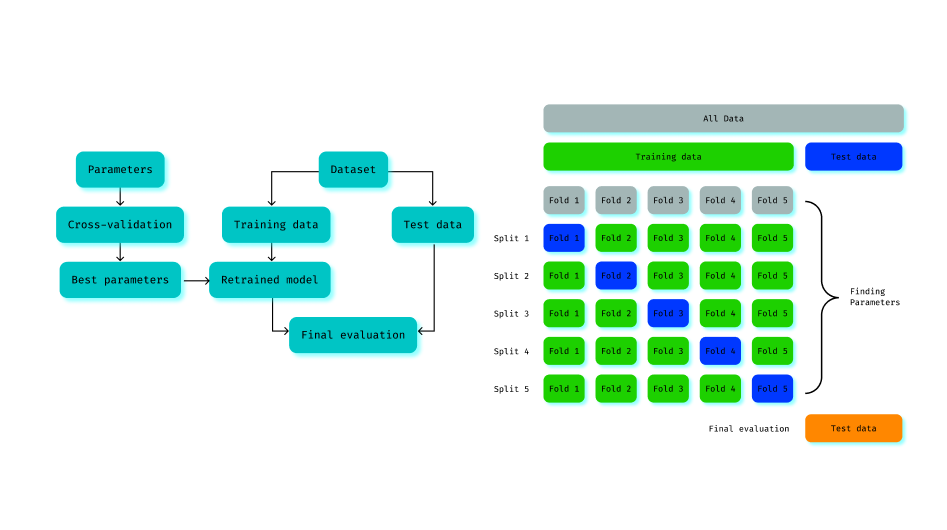

# Интерфейс sklearn

В будущем мы будем регулярно пользоваться известной библиотекой машинного обучения `sklearn`. Эта библиотека была разработана специально для работы с широким набором инструментов классического машинного обучения. `sklearn` - очень динамичный, постоянно развивающийся фреймворк, задавший стандарты для всего open-source сообщества в мире анализа данных. Одним из достижений `sklearn` является стандартизация и популяризация удобного интерфейса работы с моделями. Мы разберемся в основных универсальных элементах этого интерфейса, знание которых позволит вам довольно просто пользоваться всем инструментарием `sklearn`.

## Алгоритмы

Библиотека `sklearn` собрала множество алгоритмов ML разной природы. Эти алгоритмы распределены по модулям, среди которых нас будут интересовать прежде всего:
* `sklearn.linear_model`
* `sklearn.tree`
* `sklearn.svm`
* `sklearn.ensemble`
* `sklearn.cluster`
* `sklearn.neighbors`

Все алгоритмы, представленные в этих модулях, за редкими исключениями, имеют две ключевые функции, отвечающие запуску процессу обучения и предсказания соответственно.



### Обучение модели

Обучение модели в `sklearn` производится посредством вызова функции `.fit(X, y)` для алгоритмов supervised learning и `.fit(X)` для алгоритмов unsupervised learning. Функция `.fit` - это метод класса алгоритма, вызов которой производит подбор оптимальных параметров алгоритма, основываясь на матрице признаков объектов датасета `X` и, в случае обучения с учителем, векторе верных ответов `y`.

Приведём пример. В данном случае совершенно неважно, какой конкретно алгоритм применяется для решения задачи. Мы хотим лишь продемонстрировать общую схему работы с алгоритмом. Прежде всего мы сгенерируем датасет.

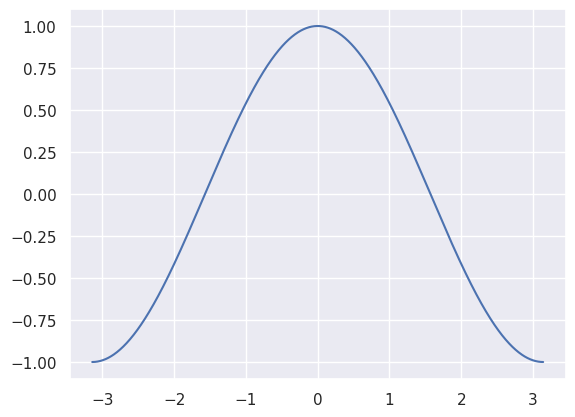

In [ ]:
X = np.linspace(-np.pi, np.pi, 1000).reshape(-1, 1)
y = np.cos(X)

plt.plot(X, y)

In [ ]:
# Разбиение выборки на train и test
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [ ]:
# Выберем некоторый алгоритм из модуля sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

# Создадим объект импортированного класса
regressor = RandomForestRegressor()

# Обучим его при помощи вызова функции .fit()
regressor.fit(X_train, y_train);

<ipython-input-14-f8ab29b9e1d6>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train);


### Применение модели

Для составления прогноза на данных, которые модель "не видела" при обучении, используется функция `.predict(X)`. Вызов этой функции позволяет получить предсказания для каждого из объектов матрицы `X`. Эта функция актуальна для алгоритмов supervised learning.

In [ ]:
# Составим предсказания алгоритма для тестовой выборки

y_pred = regressor.predict(x_test)

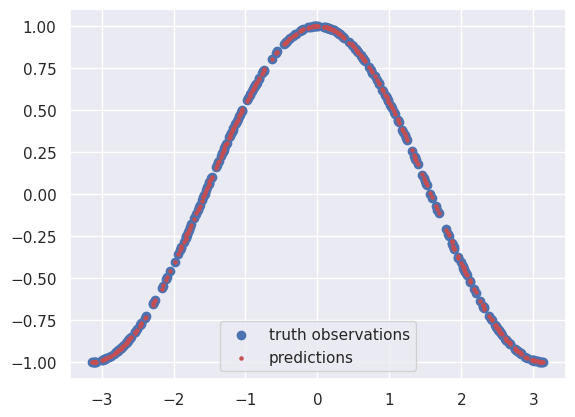

In [ ]:
plt.scatter(x_test, y_test, label='truth observations');
plt.scatter(x_test, y_pred, s=5, c='r', label='predictions');
plt.legend()
plt.show();

### Оценка качества

В `sklearn` существует широкий арсенал метрик качества моделей классификации и регрессии. Он реализован в модуле `sklearn.metrics`. Мы разберёмся с этими метриками в процессе нашего курса, но сегодня я хочу обратить ваше внимание на простой способ измерения качества модели - использование функции `.score(X, y)`. Эта функция вызывает процесс прогноза модели для датасета `X` и сравнивает получившийся прогноз с истинными метками `y`, применяя одну из двух функций:
* accuracy (доля правильных ответов), если речь идёт о задаче классификации
* $R^2$ (коэффициент детерминации), если речь идёт о задаче регрессии (эту метрику мы подробно обсудим на одной из будущих лекций)

In [ ]:
regressor.score(x_test, y_test)

0.9999782907844347

## Предобработка данных

В течение нашего курса мы убедимся, что для разных алгоритмов ML требуются разные способы предобработки данных. К таким способам может относиться приведение признаков к единой шкале, расшифровка категориальных признаков, нормировка, преобразование текстовых признаков и многие другие. Для работы с такими механизмами создан отдельный модуль, также придерживающйся правил интерфейса. Методы предобработчиков (трансформеров) мало отличаются от методов алгоритмов, за тем исключением, что функция `predict`, позволяющая алгоритмам осуществлять предсказания, заменяется  на функцию `transform`, позволяющую предобработчикам преобразовывать данные. Приведём пример наиболее популярного предобработчика.

### Standard Scaling

Standard Scaling - это общепринятая в статистике процедура нормализации [выборки](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC):

$$\hat{x} = \frac{x - μ}{σ}$$

Где $μ = E[x]$ - [математическое ожидание](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=WFWnaX2VjmSc), которое обычно заменяется просто выборочной оценкой (среднему значению $x$ по датасету), а $σ$ соответственно - [стандартное отклонение](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=iIg2ARx8qfdJ), которое также обычно вычисляется по датасету.

Сделать это можно при помощи соответственно `np.mean()` и `np.std()`.

Теперь мы довольно просто можем написать функцию `scale`:

In [ ]:
def scale(X):
    """
    Масштабирование признаков в наборе данных.

    Args:
        X (array-like): Входной массив данных.

    Returns:
        array-like: Масштабированные значения признаков.
    """
    x_mean = X.mean(axis=0)
    x_std  = X.std(axis=0)
    X_scaled = (X - x_mean)/x_std
    return X_scaled


Сгенерируем искусственную выборку и проверим, что все координаты действительно будут отмасштабированы.

In [ ]:
scales = np.array([1, 0.1, 10])
x = np.random.randn(1000, 3) * scales.reshape(1, -1)
print(x)

[[ 0.08704707 -0.02990074  0.91760777]
 [-1.98756891 -0.02196719  3.57112572]
 [ 1.47789404 -0.05182702 -8.08493603]
 ...
 [ 0.01840163  0.02252641  6.92722755]
 [-1.2693305   0.17025147  2.02328796]
 [ 1.6318569  -0.0733033  18.18061923]]


#### Violinplot
_________________________________________________________________

**Пояснение:** в этом разделе используется метод визуализации violinplot. Этот метод используется исключительно для визуальной демонстрации преобразований, которые совершаются при выполнении нормализации.

Воспользуемся методом визуализации при помощи `violinplot`.

`Violinplot` - это способ визуализации гистограмм или распределений, при котором частотные характеристики отложены вдоль горизонтальной оси, в то время как вертикальная ось служит для отметки значений, на которых эти характеристики измерены.

Проще говоря, мы берём некоторую гистограмму и поворачиваем её набок. Вместо гистограммы можно взять [плотности вероятностных распределений](https://ru.wikipedia.org/wiki/Плотность_вероятности).

Например, посмотрим на то, как выглядит самый обычный график нормального распределения.

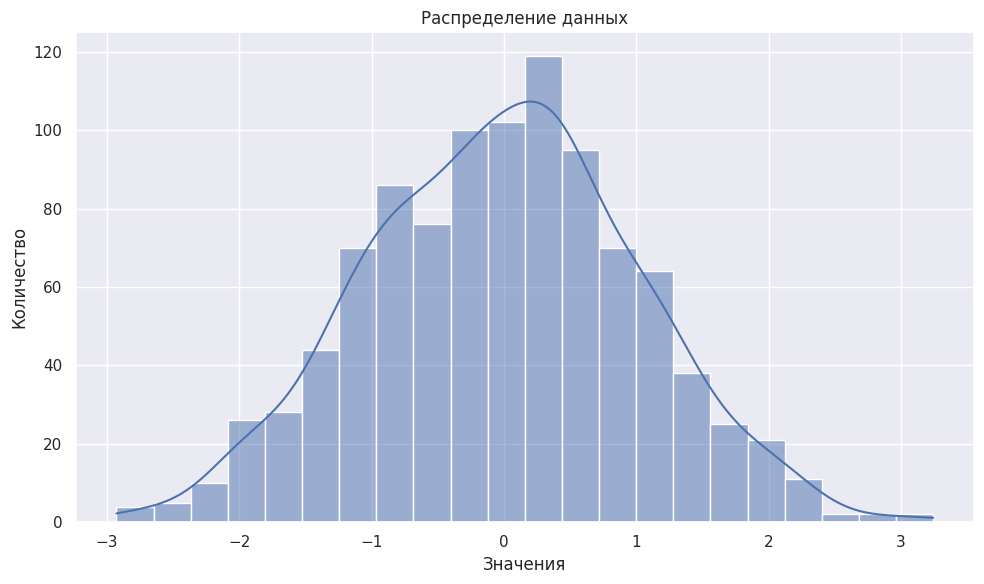

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

data = np.random.randn(1000)
df = pd.DataFrame({'data': data})

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df['data'], ax=ax, kde=True)

ax.set_xlabel('Значения')
ax.set_ylabel('Количество')
ax.set_title('Распределение данных')

plt.tight_layout()
plt.show()


`Violinplot` в этом случае получится немного другим:

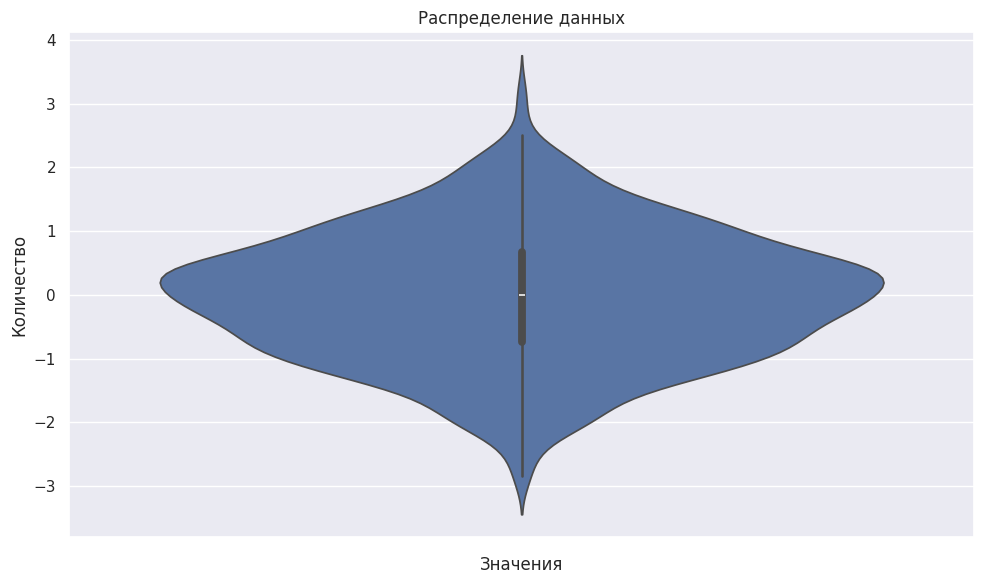

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df['data'], ax=ax)

ax.set_xlabel('Значения')
ax.set_ylabel('Количество')
ax.set_title('Распределение данных')

plt.tight_layout()
plt.show()

А равномерное распределение, к примеру, будет выглядеть так:

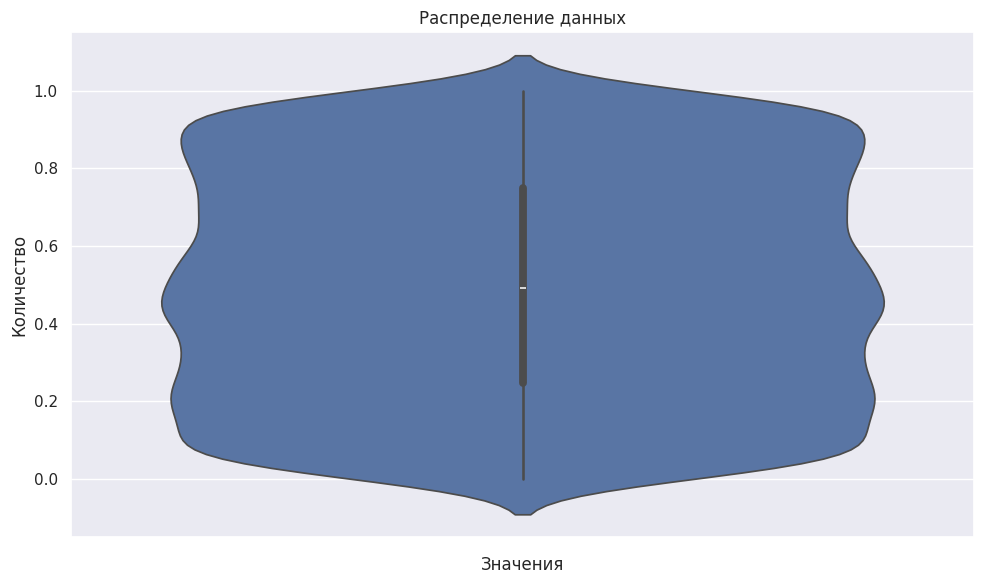

In [ ]:
data = np.random.uniform(size=10000)
df = pd.DataFrame({'data': data})

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df['data'], ax=ax)

ax.set_xlabel('Значения')
ax.set_ylabel('Количество')
ax.set_title('Распределение данных')

plt.tight_layout()
plt.show()

_______________________

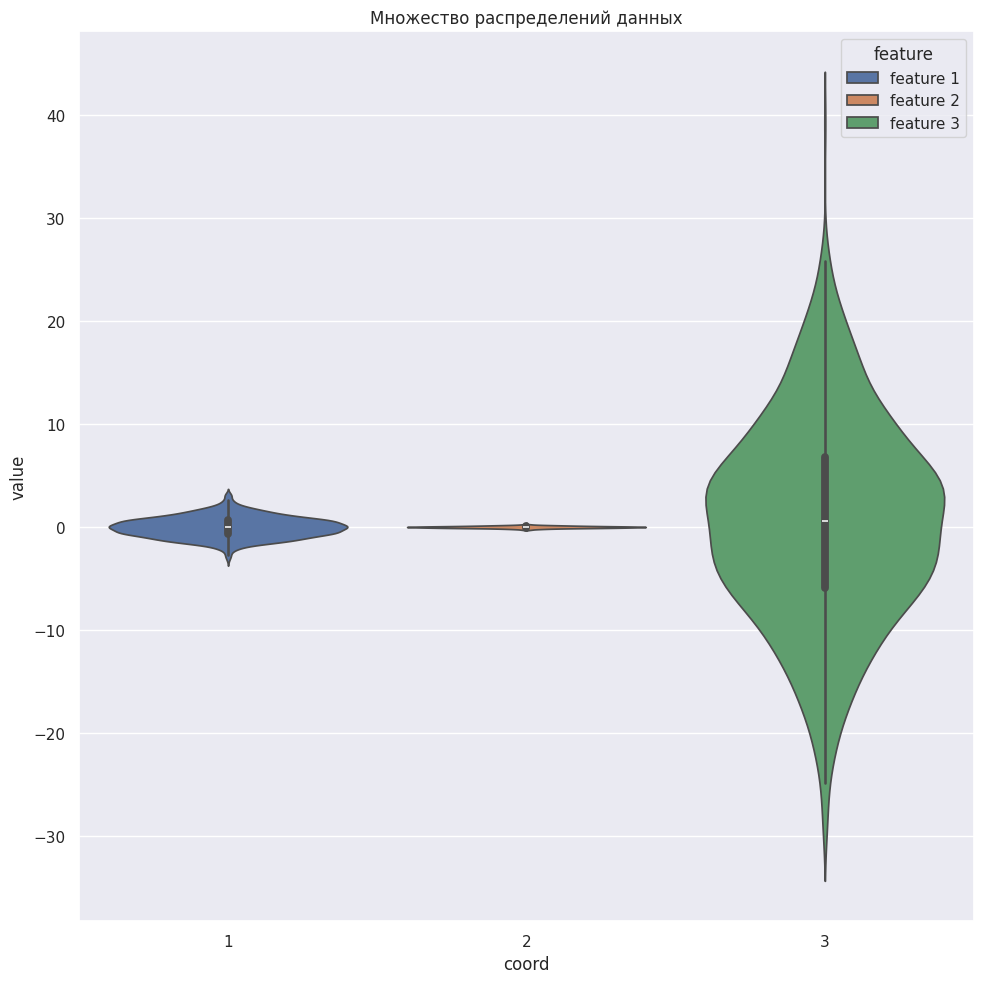

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def draw_violin(x):
    """
    Рисование многоцветного диамантового графика.

    Args:
        x (array-like): Массив данных с тремя столбцами.

    Returns:
        None
    """
    df = pd.DataFrame({
        'value': x[:,0].tolist() + x[:,1].tolist() + x[:,2].tolist(),
        'feature': ['feature 1']*1000 + ['feature 2']*1000 + ['feature 3']*1000,
        'coord': [1]*1000 + [2]*1000 + [3]*1000
    })
    plt.figure(figsize=(10,10))
    sns.violinplot(data=df, x='coord', y='value', hue='feature')
    plt.title('Множество распределений данных')
    plt.tight_layout()
    plt.show()

draw_violin(x)


Сейчас, как мы видим, все признаки серьёзно отличаются по масштабу. Применим функцию `scale`:

In [ ]:
x_scaled = scale(x)
print(x_scaled)

[[ 0.09735778 -0.35825925  0.04030338]
 [-1.96516362 -0.27708042  0.3104591 ]
 [ 1.48009641 -0.58261672 -0.87624917]
 ...
 [ 0.02911253  0.17819372  0.65214516]
 [-1.25111238  1.68976836  0.15287312]
 [ 1.63316169 -0.80236954  1.79785743]]


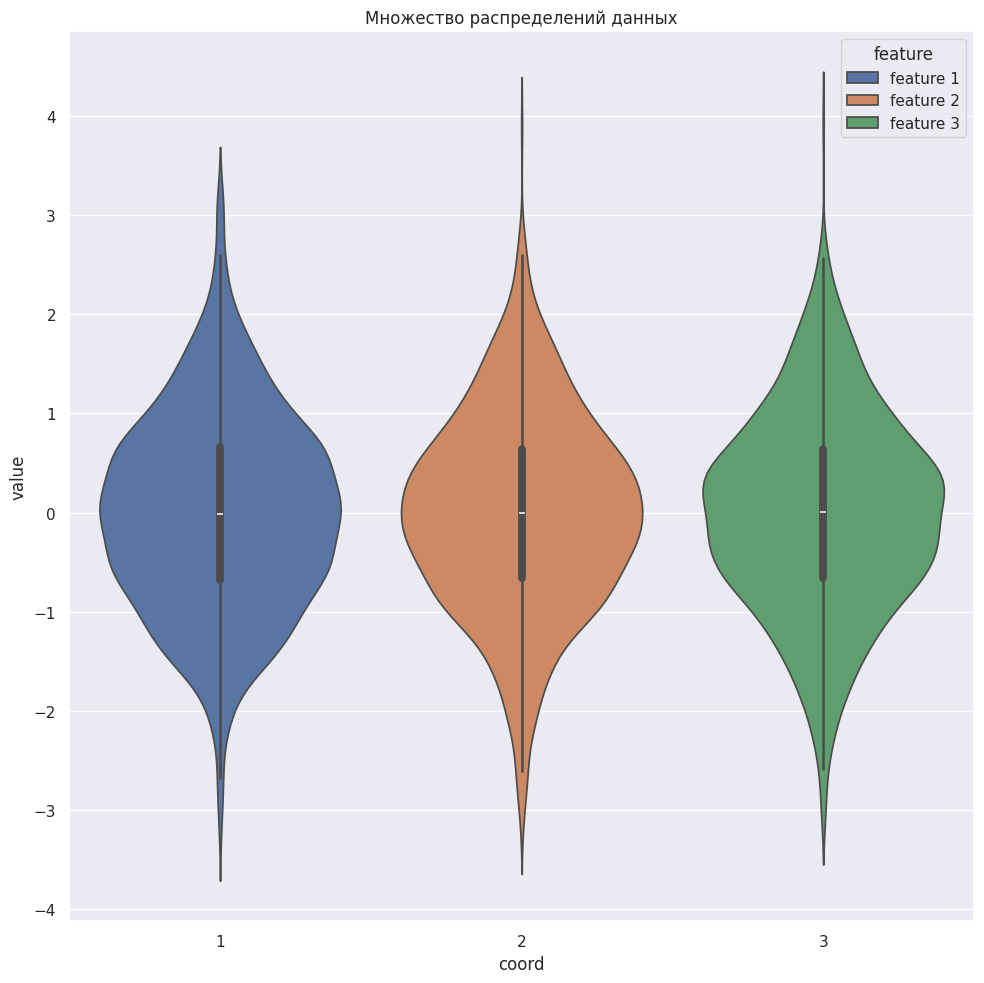

In [ ]:
draw_violin(x_scaled)

Как мы видим, все признаки теперь приведены к единой шкале и имеют один и тот же масштаб. Заметьте: средние значения никак не изменились.

Конечно, такая функция есть и в библиотеке `sklearn`.

Рекомендуемая реализация содержится в классе `sklearn.preprocessing.StandardScaler`

Объекты класса `StandardScaler` относятся к т.н. *трансформерам данных*, то есть преобразуют их. В этой связи, они поддерживают функции `.fit()`, `.transform()` и `.fit_transform()`

`.transform` и `.fit_transform` - это полные аналоги `.predict` и `.fit_predict`, используемые в случаях, когда мы вместо решения задачи прогнозирования просто преобразуем каким-либо способом данные. У всех "преобразователей" данных в `sklearn` эти функции реализованы.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_sk = sc.fit_transform(x)

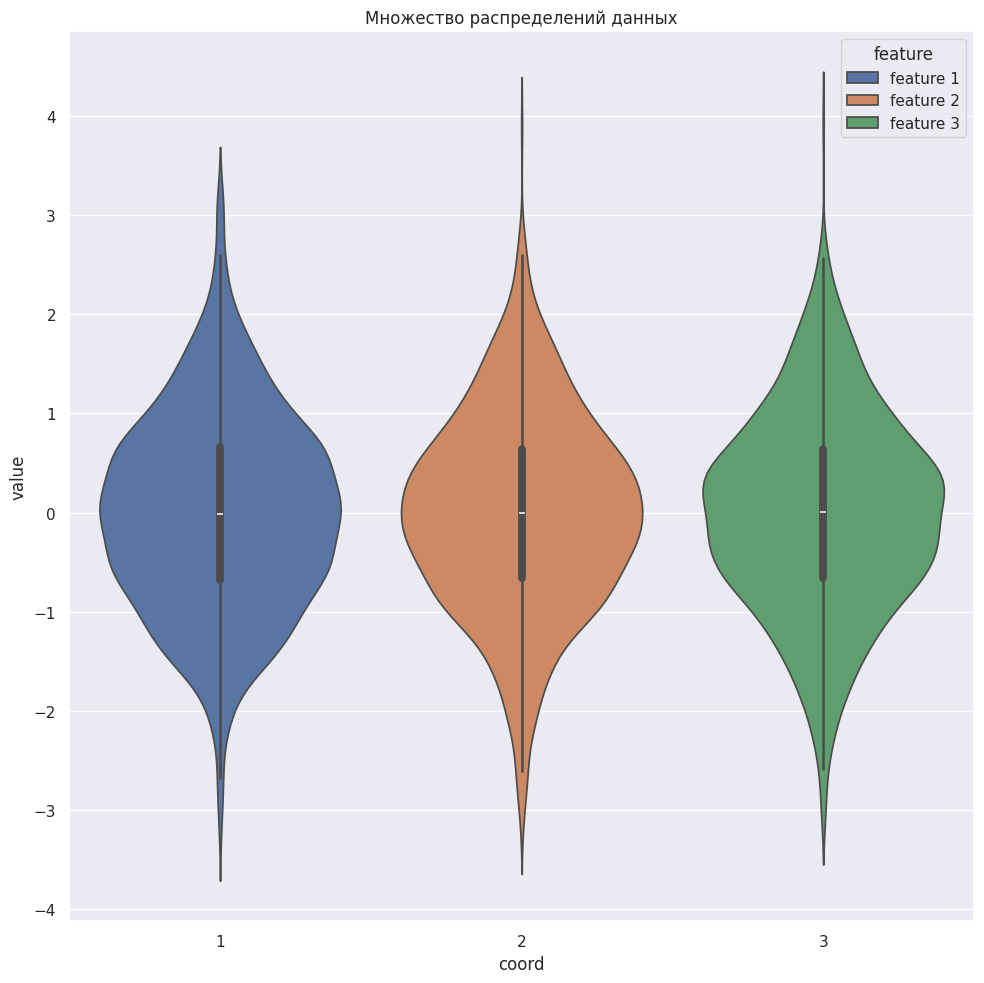

In [ ]:
draw_violin(x_sk)

## Датасеты

В `sklearn` есть доступ к некоторому числу готовых классических датасетов. Этот доступ реализован через функции модуля `sklearn.datasets`. Например, через этот модуль можно загрузить классический датасет **ирисов Фишера**, с которым мы уже успели познакомиться.

In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

## Работа с моделями

Функции, необходимые для корректной работы с моделями ML, реализованы в `sklearn.model_selection`. Например, функция `train_test_split` реализована именно в этом модуле. В рамках этого модуля можно обратиться и к инструменту проведения перекрёстной валидации.

Метод кросс-валидации реализован в виде функционального блока в библиотеке `sklearn`. Для обращения к функции `cross_val_score` необходимо импортировать её из модуля `sklearn.model_selection`.

`cross_val_score` вернёт нам массив чисел $(score_1 ... score_n)$.

Под $score_i$ здесь подразумевается оценка качества работы алгоритма в случае, когда в качестве тестовой выборки был выбран именно $i$-й "кусок" данных, а остальные вошли в обучающую выборку. Под качеством здесь могут подразумеваться разные метрики, это настраиваемый параметр, но в базовом случае под $score$ подразумевается доля правильных ответов алгоритма.

Средняя оценка: 0.6755


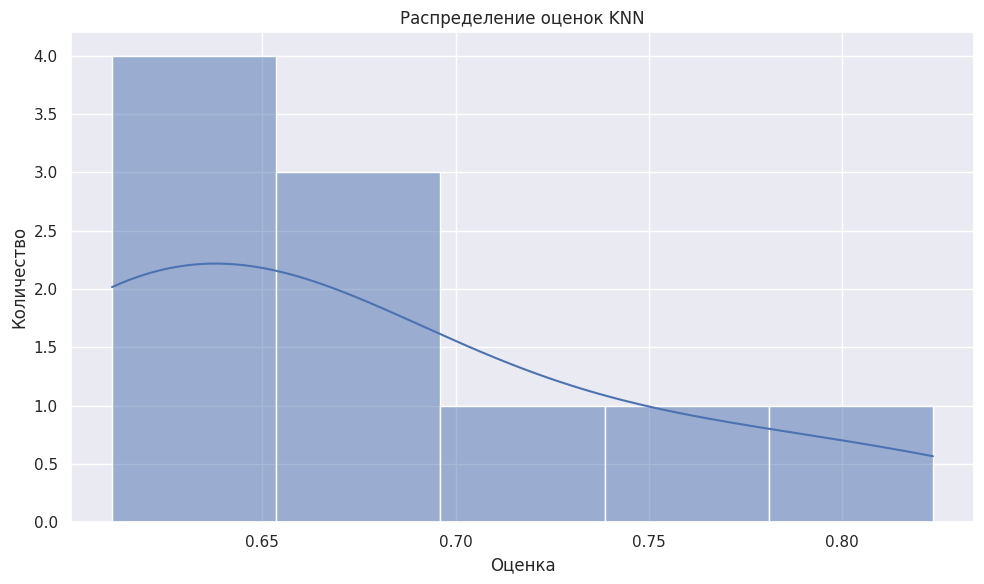

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

# Загрузим другой классический датасет wine
X, y = load_wine(return_X_y=True)

# Создадим экземпляр классификатора KNN (будем разбирать на одной из следующих лекций)
clf = KNeighborsClassifier(n_neighbors=5)

# Выполним кросс-валидацию
scores = cross_val_score(clf, X, y, cv=10)

# Выведем среднее
print(f"Средняя оценка: {scores.mean():.4f}")

# Выведем распределение оценок
plt.figure(figsize=(10, 6))
sns.histplot(scores, kde=True)
plt.title('Распределение оценок KNN')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()


In [ ]:
scores

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

Представленный код нужно интерпретировать следующим образом:

При помощи функции `sklearn.model_selection.crossval` мы разбили выборку на $cv$=5 элементов, и провели описанную выше процедуру для каждого из них, получив 5 оценок качества (по умолчанию выставлена метрика `accuracy_score`). Эти оценки сохранены в массиве `score`.

В аргументы функции `cross_val_score` мы передали:
* объект класса `KNeighborsClassifier (clf)`. В качестве этого аргумента может быть выбран любой классификатор, поддерживающий методы `.fit()`, `.predict()` и (в случае необходимости для соответствующей метрики) `.predict_proba()`. Это функции обучения, предсказания и получения вероятности принадлежности объектов тому или иному классу соответственно. Это очень удобно, потому что позволяет нам использовать в качестве аргумента `clf` не только объекты классов из `sklearn`, но также и из других библиотек (или даже собственные классы).

* обучающую выборку $X$
* ответы к объектам обучающей выборки $y$
* $cv$ - количество "кусочков", на которые мы разбиваем выборку

Подробнее об этой функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

Этот набор чисел очень о многом нам говорит:

По среднему значению мы можем определить, насколько хорош в среднем наш алгоритм. Именно среднее значение набора метрик, полученных при кросс-валидации, считается валидной оценкой качества построенного алгоритма.

Но здесь есть свои сложности. Представим, что на выходе мы получим следующий набор чисел:

$$[0.5, 0.52, 0.9, 0.55]$$

Средним значением здесь будет 0.61, что, очевидно, связано с аномально хорошим результатом на третьей позиции. Этот результат может быть обусловлен случайностью или смещенностью какой-то из подвыборок. Его нельзя рассматривать как абсолютно корректный. Точно также нас может ввести в заблуждение среднее значение по массиву чисел с очень большим разбросом. Например, если на выходе кросс-валидации мы получим следующий результат:

$$[0.1, 0.99, 0.09, 0.95, 0.94, 0.05]$$

Верить среднему значению здесь, очевидно, нельзя. Следует искать ошибку.
Отследить такие случаи можно при помощи оценки стандартного отклонения в полученном массиве: чем оно меньше, тем оценка качества при помощи усреднения надежнее.

## Pipeline

В `sklearn` существует удобный инструмент для оптимизации всего изложенного кода. Дело в том, что стандартная задача машинного обучения имеет довольно предсказуемый ход решения: применения ряда преобразований к данным, обучение некоторого классификатора, вычисление метрики качества. Для упрощения этой процедуры разработан класс `Pipeline`.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Загрузка датасета
X, y = load_wine(return_X_y=True)

# Разбиение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Создание Pipeline и его обучение
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])
pipe.fit(X_train, y_train)

# Оценка модели
score = pipe.score(X_test, y_test)

print(f"Оценка модели: {score:.4f}")
print(f"Частота ошибок: {sum(pipe.predict(X_test) != y_test) / len(y_test):.4f}")

Оценка модели: 0.9630
Частота ошибок: 0.0370
